## Part 1: Importing Libraries

In [18]:
from src.modules import data_preprocessing as dp
from src.modules import data_visualization as dv
from src.modules import modeling as md

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

## Part 2: Download Dataset

In [5]:
# Declare the ticker symbol. Here we use 5 stocks "AAPL MSFT AMD GOOG META" as an example.
tickers = "AAPL MSFT AMD GOOG META"

In [6]:
# Download the data from Yahoo Finance
df = dp.download_data(tickers)

[*********************100%%**********************]  5 of 5 completed


In [7]:
df.head()

Adj Close                                             Close        \
                 AAPL   AMD       GOOG       META       MSFT       AAPL   AMD   
Date                                                                            
2013-09-09  15.777156  3.69  22.118345  44.040001  26.512550  18.077499  3.69   
2013-09-10  15.417768  3.87  22.133787  43.599998  27.123867  17.665714  3.87   
2013-09-11  14.578372  3.82  22.321085  45.040001  27.416958  16.703930  3.82   
2013-09-12  14.733598  3.75  22.243128  44.750000  27.375086  16.881786  3.75   
2013-09-13  14.490782  3.83  22.143749  44.310001  27.659805  16.603571  3.83   

                                             ...       Open                   \
                 GOOG       META       MSFT  ...       AAPL   AMD       GOOG   
Date                                         ...                               
2013-09-09  22.118345  44.040001  31.660000  ...  18.035713  3.63  22.010748   
2013-09-10  22.133787  43.599998  32.389999  ...  18.078571  3.78  22.167412   
2013-09-11  22.321085  45.040001  32.740002  ...  16.678928  3.87  22.130548   
2013-09-12  22.243128  44.750000  32.689999  ...  16.732143  3.76  22.351221   
2013-09-13  22.143749  44.310001  33.029999  ...  16.762142  3.75  22.278994   

                                     Volume                                \
                 META       MSFT       AAPL       AMD      GOOG      META   
Date                                                                        
2013-09-09  44.360001  31.219999  340687200  23646200  49569103  75794700   
2013-09-10  44.240002  31.900000  743195600  33201100  51697050  54540300   
2013-09-11  43.389999  32.570000  898696400  24009100  64665477  72328300   
2013-09-12  45.529999  32.720001  404051200  28947700  43984248  68072300   
2013-09-13  45.040001  32.770000  298835600  25331400  53214717  52765300   

                      
                MSFT  
Date                  
2013-09-09  49628500  
2013-09-10  56881200  
2013-09-11  39087500  
2013-09-12  32860200  
2013-09-13  40899000  

[5 rows x 30 columns]

In [8]:
df.columns = df.columns.droplevel(0)

In [10]:
# Got the ajusted close price for the stocks
df = df.iloc[:,0:5]

In [11]:
# Checking the adjusted close price for the stocks
df

,AAPL,AMD,GOOG,META,MSFT
Date,,,,,
2013-09-09,15.777156,3.690000,22.118345,44.040001,26.512550
2013-09-10,15.417768,3.870000,22.133787,43.599998,27.123867
2013-09-11,14.578372,3.820000,22.321085,45.040001,27.416958
2013-09-12,14.733598,3.750000,22.243128,44.750000,27.375086
2013-09-13,14.490782,3.830000,22.143749,44.310001,27.659805
...,...,...,...,...,...
2023-09-01,189.460007,109.449997,136.800003,296.380005,328.660004
2023-09-05,189.699997,110.779999,136.710007,300.149994,333.549988
2023-09-06,182.910004,109.279999,135.369995,299.170013,332.880005


## Part 3: EDA & Preprocessing

In [12]:
# Set global style
dv.set_global_style()

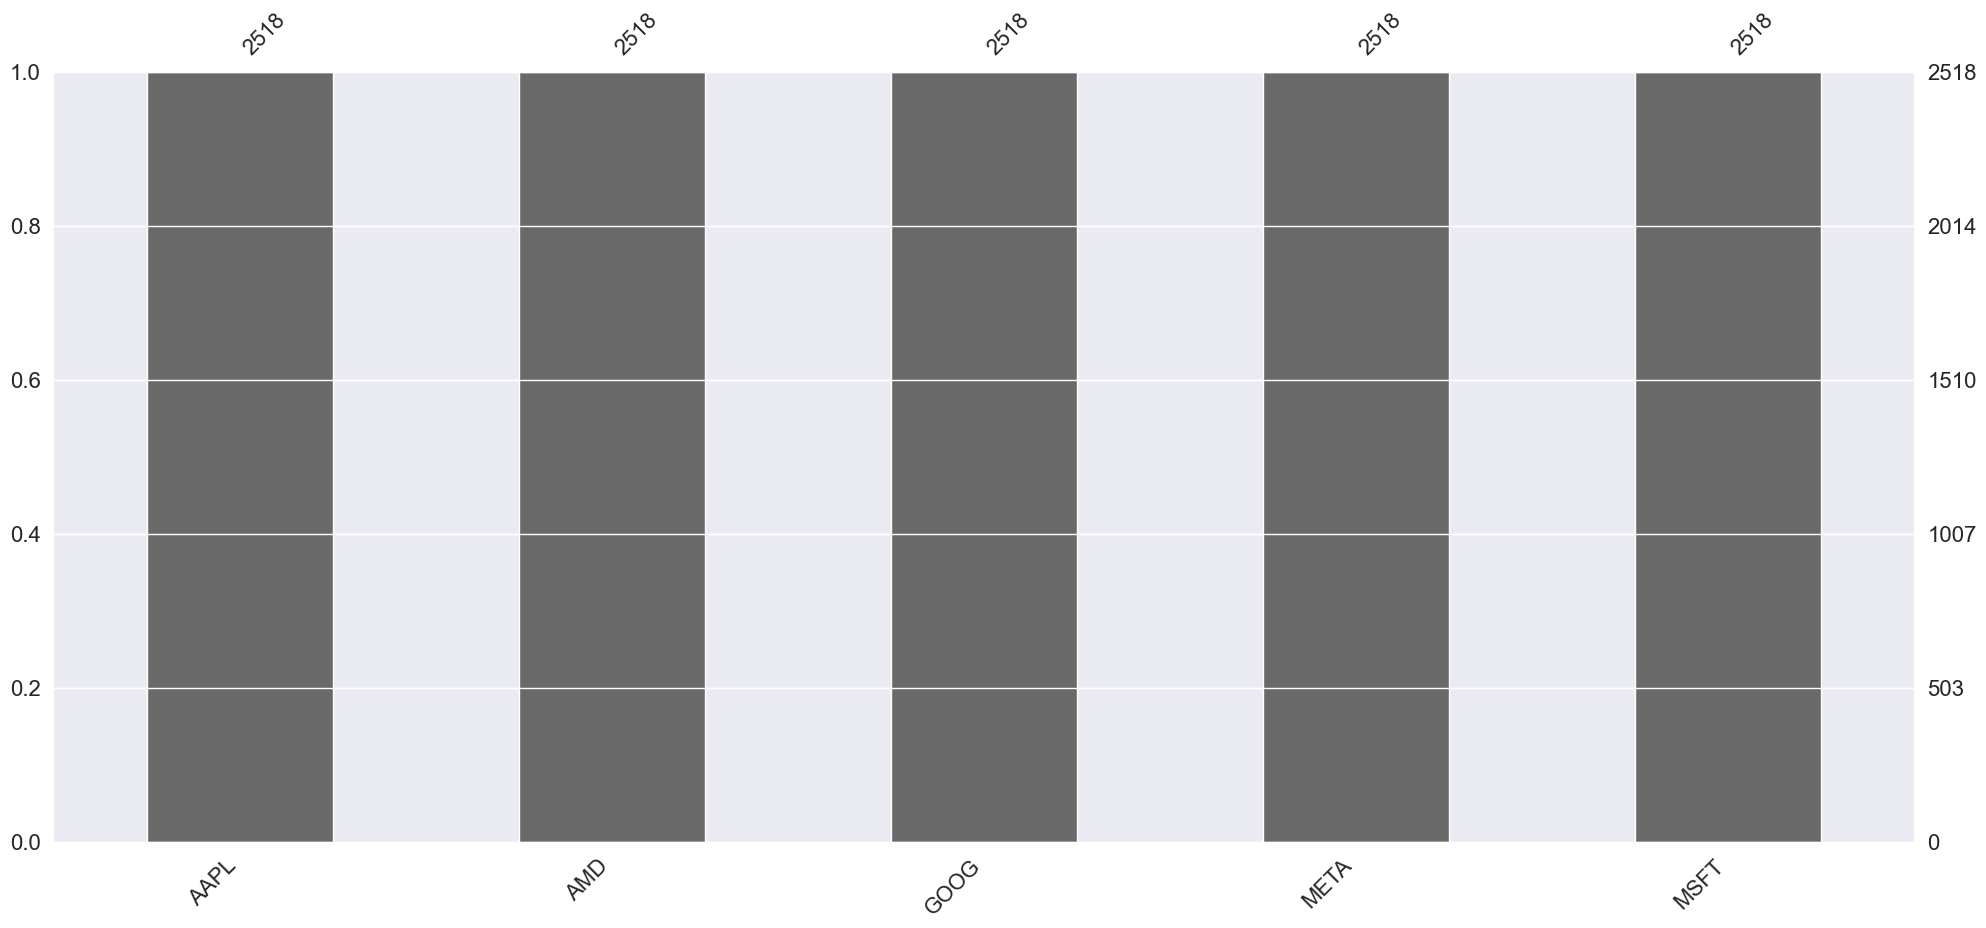

In [13]:
# Checking missing value
dv.plot_missing_values(df)

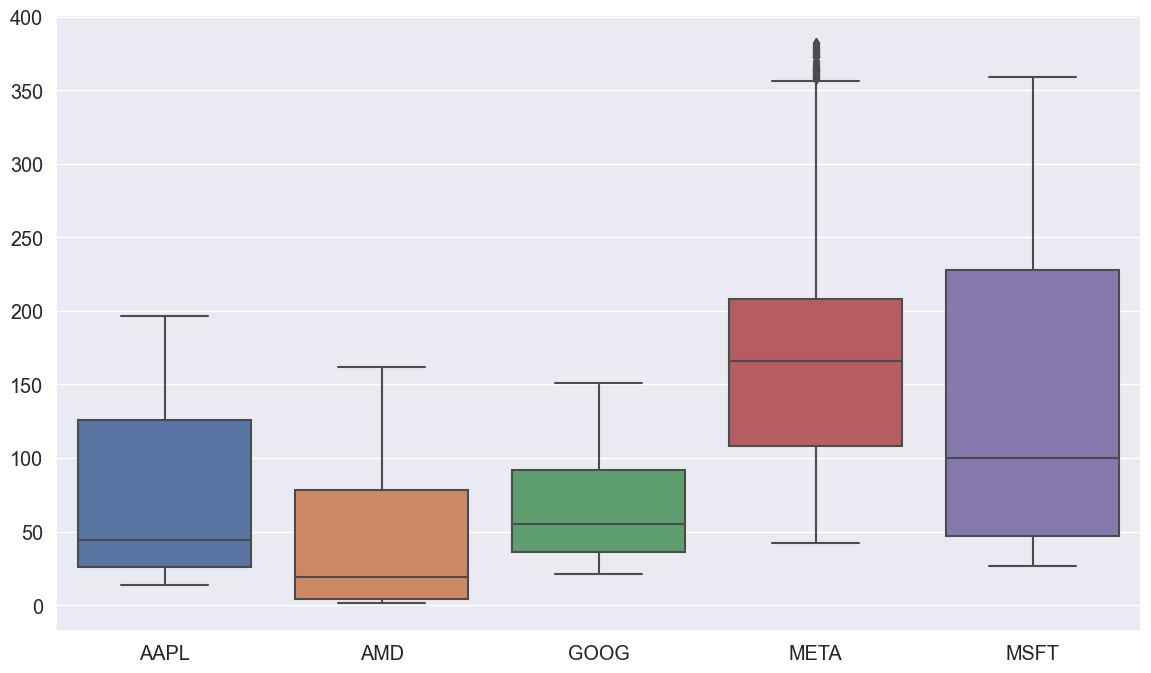

In [14]:
# Visualize the outliers data
dv.plot_outliers(df)

In [15]:
# Clean the data after checking the missing values and outliers
df = dp.clean_data(df)

In [16]:
# Change index to lowercase for convenience
df.index.name = df.index.name.lower()

In [17]:
df.shape

(2518, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-09-09 to 2023-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aapl    2518 non-null   float64
 1   amd     2518 non-null   float64
 2   goog    2518 non-null   float64
 3   meta    2518 non-null   float64
 4   msft    2518 non-null   float64
dtypes: float64(5)
memory usage: 118.0 KB


In [19]:
df.describe()

,aapl,amd,goog,meta,msft
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,70.875152,39.643566,65.572871,169.612720,135.031499
std,54.362402,40.700970,36.101107,79.961390,97.732748
min,14.030095,1.620000,21.262054,42.509998,26.512556
25%,26.269001,4.122500,36.127126,108.482500,47.202954
50%,43.972168,19.300000,55.180750,165.750000,100.056911
75%,125.772142,78.369997,91.796753,207.827496,227.491306
max,196.185074,161.910004,150.709000,382.179993,358.730469


Summary of EDA
- There are 2518 data points, 6 features
- 5 features are numerical
- There are some outliers in `meta` feature, using data cleaning technique to set the value within an appropriate threshold
- There is no missing nor duplicated values

## Part 4: Data Transformation

In [ ]:
# # get the adj close values
# close_data = df.filter(['adj close'])
# dataset = close_data.values

# # select a subset of the data for training purpose
# # the remaining set of the data is for validation
# num_training_points = int(np.ceil(len(dataset) * .80))
# print(num_training_points)

In [39]:
def scale_data(dataframe, ticker):
    # get the adj close values
    close_data = dataframe.filter([ticker])
    dataset = close_data.values

    # select a subset of the data for training purpose
    # the remaining set of the data is for validation
    # Get 80% of the data for training
    num_training_points = int(np.ceil(len(dataset) * 0.8))
    # X_train = dataset[0:num_training_points, :]
    # X_test = dataset[num_training_points:, :]

    # scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_dataset = scaler.fit_transform(dataset)

    # split the data into train and test scaled data sets
    scaled_data_train = scaled_data[0:int(num_training_points), :]
    # scaled_data_test = scaled_data[int(num_training_points)-window_size:, :]

    return dataset, scaled_dataset, scaled_data_train, num_training_points, scaler

## Part 5: Feature Engineering

In [20]:
def convert_to_supervised(data, window_size=60):
    # convert the data into a supervised learning problem
    # the number of time steps to look back is the window size
    # the next day's adjusted close price is the label

    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    
    X, y = np.array(X), np.array(y)

    # reshape the data into the shape accepted by the LSTM
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y

In [21]:
# Transform the data to supervised learning
window_size = 60 # window size is the number of previous days used to predict the next day. 

In [40]:
def get_features_labels(dataframe, ticker, window_size=60):
    dataset, scaled_dataset, scaled_data_train, num_training_points, scaler = scale_data(dataframe, ticker)
    features, labels = convert_to_supervised(scaled_data_train, window_size)
    return features, labels, dataset, scaled_dataset, num_training_points, scaler

## Part 6: Modeling

In [35]:
# # Modeling
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape = (features.shape[1], 1)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(units = 64, return_sequences = True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(units = 32, return_sequences = False),
#     # tf.keras.layers.Dropout(0.2),
#     # tf.keras.layers.LSTM(units = 50),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(units = 25),
#     tf.keras.layers.Dense(units = 1)
# ])

In [34]:
def build_and_train_model(features, labels):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(features.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    # cp = ModelCheckpoint('model/', save_best_only=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    # Train the model
    # history = model.fit(features, labels, epochs = 20, batch_size = 32, verbose = 1, callbacks=[cp])
    history = model.fit(features, labels, epochs = 100, batch_size = 32, verbose = 1)
    return model, history

In [42]:
features, labels, dataset, scaled_dataset, num_training_points, scaler = get_features_labels(dataframe=df, ticker='aapl', window_size=60)

In [37]:
model, history = build_and_train_model(features, labels)

Epoch 1/100
62/62 [==============================] - 21s 125ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748
Epoch 2/100
62/62 [==============================] - 7s 120ms/step - loss: 4.1672e-04 - root_mean_squared_error: 0.0204
Epoch 3/100
62/62 [==============================] - 7s 121ms/step - loss: 3.5100e-04 - root_mean_squared_error: 0.0187
Epoch 4/100
62/62 [==============================] - 7s 113ms/step - loss: 3.6717e-04 - root_mean_squared_error: 0.0192
Epoch 5/100
62/62 [==============================] - 7s 111ms/step - loss: 3.5633e-04 - root_mean_squared_error: 0.0189
Epoch 6/100
62/62 [==============================] - 7s 119ms/step - loss: 3.0753e-04 - root_mean_squared_error: 0.0175
Epoch 7/100
62/62 [==============================] - 8s 121ms/step - loss: 3.1268e-04 - root_mean_squared_error: 0.0177
Epoch 8/100
62/62 [==============================] - 7s 117ms/step - loss: 2.8693e-04 - root_mean_squared_error: 0.0169
Epoch 9/100
62/62 [========================

## Part 7: Evaluation Model

In [43]:
# Create the testing data set.
# The testing data set contains the remaining 20% of the data but we have to
# include the last 60 days from the training data set to predict the first stock price of the test data set
# scaled_data_test = scaled_data[num_training_points - window_size:, :]

# # Create the data sets x_test and y_test
# X_test = []
# y_test = dataset[num_training_points:, :]

# for i in range(60, len(scaled_data_test)):
#     x_test.append(scaled_data_test[i-window_size:i, 0])

# # Convert the values into arrays for easier computation 
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
scaled_data_test = scaled_data[num_training_points - window_size:, :]
X_test, y_test = convert_to_supervised(scaled_data_test, window_size)

# predict the testing data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
 
# evaluate result by mse and rmse metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

16/16 [==============================] - 1s 76ms/step
MSE 24532.175992832694
RMSE 156.62750713981467


In [46]:
df_test = df[['aapl']]
df_test.head()

,aapl
date,
2013-09-09,15.777156
2013-09-10,15.417768
2013-09-11,14.578372
2013-09-12,14.733598
2013-09-13,14.490782


C:\Users\thong.lam\AppData\Local\Temp\ipykernel_5300\3932881227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


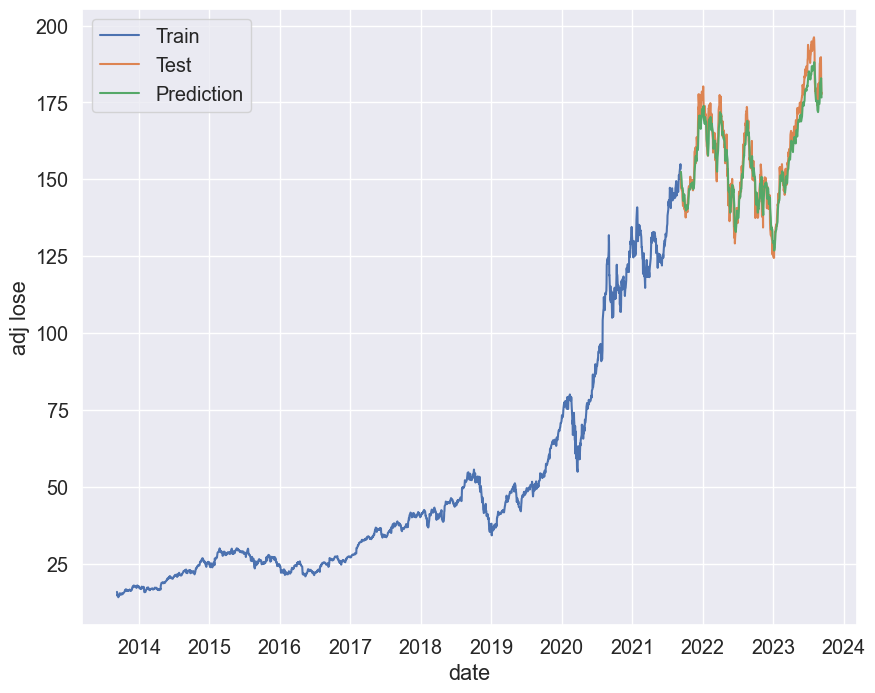

In [49]:
# Ploting the data
import matplotlib.pyplot as plt

train = df_test[:num_training_points]
test = df_test[num_training_points:]
test['predictions'] = predictions
 
plt.figure(figsize=(10, 8))
plt.plot(train.index, train['aapl'])
plt.plot(test.index, test[['aapl', 'predictions']])
# plt.title('Daily Stock Price from ' + df.index[0] + ' to ' + df.index[-1])
plt.xlabel('date')
plt.ylabel("adj lose")
plt.legend(['Train', 'Test', 'Prediction'])
plt.savefig("output/figures/visualizing_testing_data.png", dpi=100)
plt.show()

In [160]:
# # Modeling
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape = (features.shape[1], 1)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(units = 64, return_sequences = True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(units = 32, return_sequences = True),
#     # tf.keras.layers.Dropout(0.2),
#     # tf.keras.layers.LSTM(units = 8, return_sequences = False),
#     # tf.keras.layers.Dropout(0.2),
#     # tf.keras.layers.LSTM(units = 50),
#     # tf.keras.layers.Dropout(0.2),
#     # tf.keras.layers.Dense(units = 50),
#     tf.keras.layers.Dense(units = 25),
#     tf.keras.layers.Dense(units = 1)
# ])

Future Predictions

In [55]:
# Function to generate the future forecasts
def generate_future_forecasts(n_past, n_future, data, features, labels):

    x_past = features[- n_past - 1:, :, :][:1]  # last observed input sequence
    y_past = labels[- n_past - 1]             # last observed target value
    y_future = []                        # predicted target values

    for i in range(n_past + n_future):

        # feed the last forecast back to the model as an input
        x_past = np.append(x_past[:, 1:, :], y_past.reshape(1, 1, 1), axis=1)

        # generate the next forecast
        y_past = model.predict(x_past)

        # save the forecast
        y_future.append(y_past.flatten()[0])

    # transform the forecasts back to the original scale
    y_future = scaler.inverse_transform(np.array(y_future).reshape(-1, 1)).flatten()

    # add the forecasts to the data frame
    df_past = data.rename(columns={'aapl': 'Actual'}).copy()

    df_future = pd.DataFrame(
        index=pd.bdate_range(start=data.index[- n_past - 1] + pd.Timedelta(days=1), periods=n_past + n_future),
        columns=['Forecast'],
        data=y_future
    )

    return y_future, df_past.join(df_future, how='outer')

In [56]:
# prepare data for forecasting
forecast_data = df[['aapl']]

z = scaler.transform(forecast_data)

x, y = [], []

for i in range(window_size, len(z)):
    x.append(z[i - window_size: i])
    y.append(z[i])

x, y = np.array(x), np.array(y)

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [53]:
tickr = 'aapl'

1/1 [==============================] - 0s 50ms/step


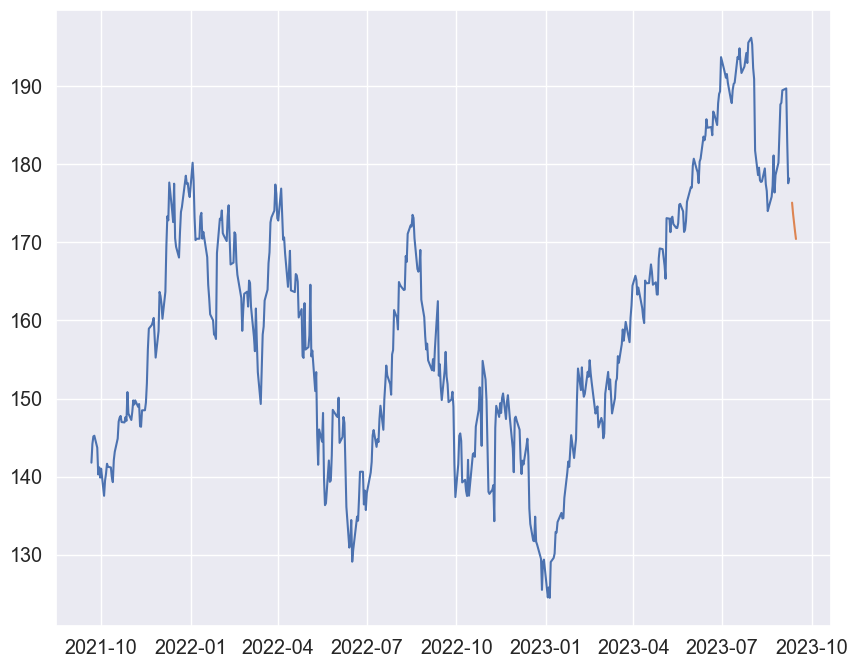

In [63]:
# forecast the next 5 days
y_future_5, df1 = generate_future_forecasts(n_past=0, n_future=5, data=df[['aapl']], features=x, labels=y)
# df1.tail(500).plot(title=ticker)
plt.figure(figsize=(10, 8))
plt.plot(df1.tail(500))
plt.savefig("output/figures/visualizing_forecast_data_5days.png", dpi=100)


In [ ]:
# # forecast the next 10 days
y_future_10, df2 = generate_future_forecasts(n_past=0, n_future=10, data=df[['aapl']], features=x, labels=y)
plt.plot(df2.tail(500))
plt.savefig("output/figures/visualizing_forecast_data_10days.png", dpi=100)

In [61]:
df.tail(5)

,aapl,amd,goog,meta,msft
date,,,,,
2023-09-01,189.460007,109.449997,136.800003,296.380005,328.660004
2023-09-05,189.699997,110.779999,136.710007,300.149994,333.549988
2023-09-06,182.910004,109.279999,135.369995,299.170013,332.880005
2023-09-07,177.559998,106.589996,136.199997,298.670013,329.910004
2023-09-08,178.179993,106.089996,137.199997,297.890015,334.269989


In [58]:
df1.tail(30)

,Actual,Forecast
2023-08-04,181.744583,NaN
2023-08-07,178.608810,NaN
2023-08-08,179.557526,NaN
2023-08-09,177.949707,NaN
2023-08-10,177.729996,NaN
2023-08-11,177.789993,NaN
2023-08-14,179.460007,NaN
2023-08-15,177.449997,NaN
2023-08-16,176.570007,NaN
2023-08-17,174.000000,NaN


In [58]:
print(y_future_5)

[186.77768 185.94986 185.14752 184.49364 184.01074]


In [59]:
print(y_future_10)

[186.77768 185.94986 185.14752 184.49364 184.01074 183.6718  183.43323
 183.25471 183.10675 182.9712 ]


## Part 9: Flask App

## Part 10: Deployment

In [176]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))

## Part 11: Conclusion